# 1.Import Libraries

In [9]:
# Data handling
import pandas as pd
import numpy as np

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report



# 2.Load Preprocessed Data

In [10]:
X_train = pd.read_csv("../data/processed/X_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

# Ensure correct shape
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5634, 13601) (1409, 13601) (5634, 1) (1409, 1)


# 3.Train Logistic Regression

In [11]:
# Initialize model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train model
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_logreg))

d:\Projects\myenv\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Metrics:
Accuracy: 0.7955997161107168
Precision: 0.634375
Recall: 0.5427807486631016
F1 Score: 0.5850144092219021
ROC-AUC: 0.714868635201116


# 4.Train Random Forest

In [12]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))


d:\Projects\myenv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Metrics:
Accuracy: 0.7970191625266146
Precision: 0.6774193548387096
Recall: 0.44919786096256686
F1 Score: 0.5401929260450161
ROC-AUC: 0.6859515874861144


# 5.Train XGBoost

In [13]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_xgb))

d:\Projects\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [12:12:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Metrics:
Accuracy: 0.7757274662881476
Precision: 0.5911949685534591
Recall: 0.5026737967914439
F1 Score: 0.5433526011560693
ROC-AUC: 0.6885349660285722


# 6.Compare Models

In [14]:
# Create a summary dataframe
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "Precision": [
        precision_score(y_test, y_pred_logreg),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ],
    "Recall": [
        recall_score(y_test, y_pred_logreg),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_logreg),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_pred_logreg),
        roc_auc_score(y_test, y_pred_rf),
        roc_auc_score(y_test, y_pred_xgb)
    ]
})

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.795600,0.634375,0.542781,0.585014,0.714869
1,Random Forest,0.797019,0.677419,0.449198,0.540193,0.685952
2,XGBoost,0.775727,0.591195,0.502674,0.543353,0.688535


# 7.Feature Importance (Logistic Regression)

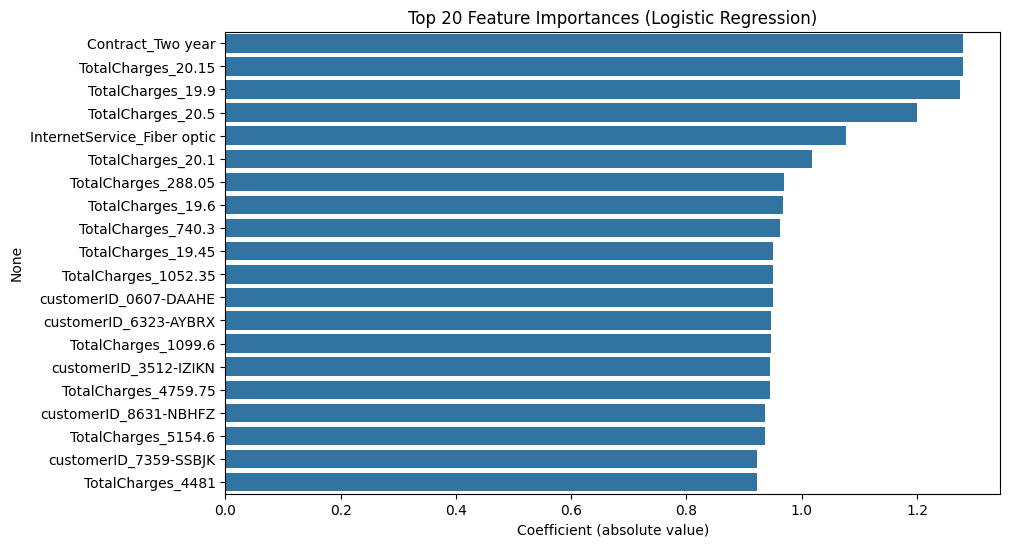

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Feature importance from Logistic Regression
coef = pd.Series(logreg.coef_[0], index=X_train.columns)
feat_importances = coef.abs().sort_values(ascending=False)[:20]  # top 20 by absolute value

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title("Top 20 Feature Importances (Logistic Regression)")
plt.xlabel("Coefficient (absolute value)")
plt.show()


# 8.Save Best Model

In [17]:
import pickle

# Logistic Regression performed best
with open("../model/churn_model.pkl", "wb") as f:
    pickle.dump(logreg, f)

print("Best model saved successfully.")

Best model saved successfully.
